# Exploratory Data Analysis

## Imports

In [1]:
import os
import SimpleITK as sitk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

from visualisation.slice_plotter import plot_slices

## Load Data

In [2]:
DATA_DIR = '../data/train'
IN_DIR = '/projects/0/ismi2018/BrainTriage/train/full'

In [3]:
label_df = pd.read_csv(os.path.join(DATA_DIR,"labels_slices.csv"), names = ["patient_nr", "slice_nr", "class"])

## Overview of Data

In [4]:
label_df["class"] = label_df["class"].astype("int8")
patient_list = np.unique(label_df["patient_nr"])
print(label_df.head(), f"Dataframe shape: {label_df.shape}", sep="\n")
print(f"\nNumber of unique patient numbers: {len(np.unique(label_df['patient_nr']))}")
print(f"Number of unique slice numbers:   {len(np.unique(label_df['slice_nr']))}")
print(f"Number of unique class values:    {len(np.unique(label_df['class']))}")

   patient_nr  slice_nr  class
0         239         0      1
1         239         1      1
2         239         2      1
3         239         3      1
4         239         4      1
Dataframe shape: (32000, 3)

Number of unique patient numbers: 1000
Number of unique slice numbers:   32
Number of unique class values:    2


## Abnormal Patients

### Retrieve Number of Abnormal Patients

In [5]:
abnormal_patients = [int(i) for i in os.listdir(os.path.join(IN_DIR, "abnormal"))]
abnormal_patient = random.choice(abnormal_patients)
print("Number of Abnormal Patients: "+str(len(abnormal_patients)))

Number of Abnormal Patients: 500


### Image Shape

In [6]:
t2_flair_abnormal_path = os.path.join(IN_DIR, "abnormal", str(abnormal_patient),'T2-FLAIR.mha')
t2_flair_abnormal_array = sitk.GetArrayFromImage(sitk.ReadImage(t2_flair_abnormal_path))
t2_flair_abnormal_array.shape

(32, 512, 512)

### Histogram

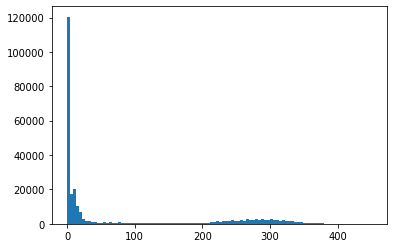

In [7]:
slice_nr = 15
image_abnormal = t2_flair_abnormal_array[slice_nr,:,:]
plt.hist(image_abnormal.flatten(), bins='auto')
plt.show()

### Plot Slices of Abnormal Patient

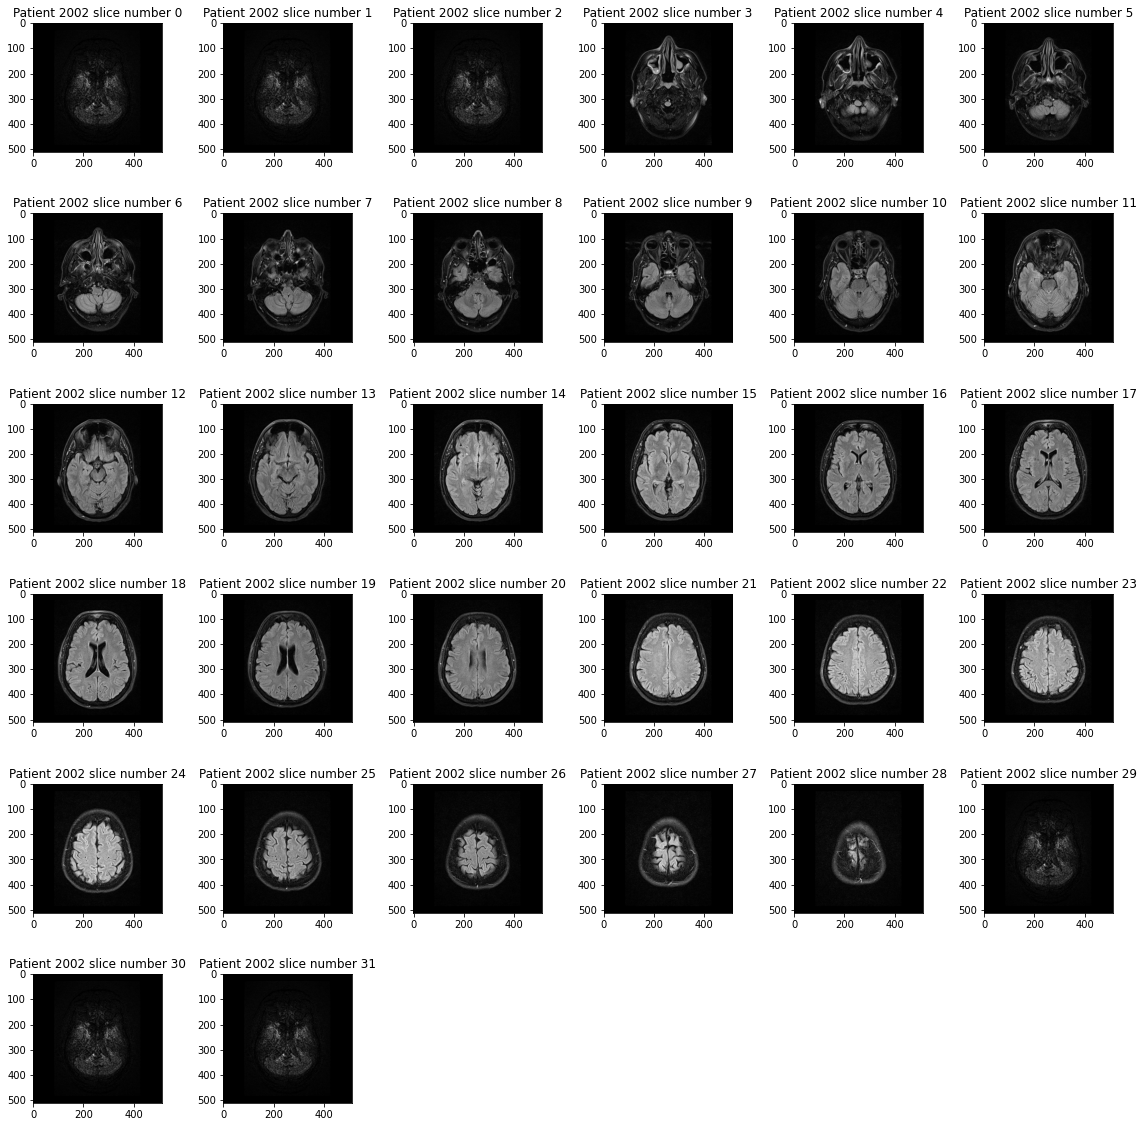

In [8]:
abnormal_patient = random.choice(abnormal_patients)
plot_slices(abnormal_patient,(0,31),DATA_DIR,6)

### Cropped Image

In [9]:
IMG_SIZE = t2_flair_abnormal_array.shape[1]
crop_idx = (IMG_SIZE - 425)//2
cropped_image_abnormal = image_abnormal[crop_idx:-crop_idx, crop_idx:-crop_idx]

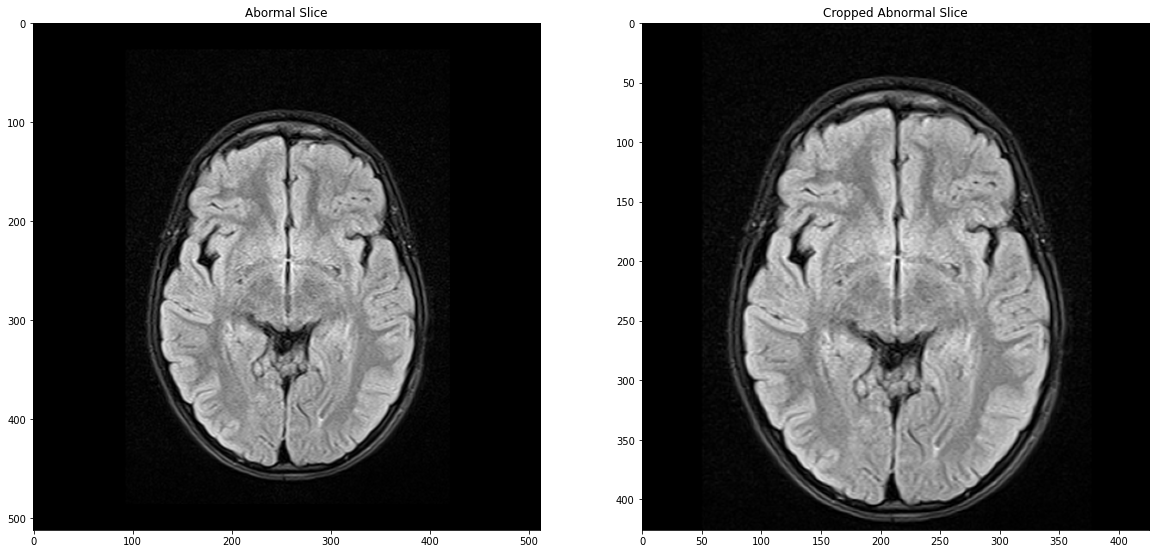

In [10]:
plt.figure(figsize=(20,20))
ax2 = plt.subplot(1,2,1)
ax2.set_title("Abormal Slice")
ax2.imshow(image_abnormal, cmap="gray")
ax3 = plt.subplot(1,2,2)
ax3.set_title("Cropped Abnormal Slice")
ax3.imshow(cropped_image_abnormal, cmap="gray")

## Normal Patients

### Retrieve Number of Normal Patients

In [11]:
normal_patients = [int(i) for i in os.listdir(os.path.join(IN_DIR, "normal"))]
normal_patient = random.choice(normal_patients)
print("Number of Normal Patients: "+str(len(normal_patients)))

Number of Normal Patients: 500


### Image Shape

In [12]:
t2_flair_normal_path = os.path.join(IN_DIR, "normal", str(normal_patient),'T2-FLAIR.mha')
t2_flair_normal_array = sitk.GetArrayFromImage(sitk.ReadImage(t2_flair_normal_path))
t2_flair_normal_array.shape

(32, 512, 512)

### Histogram

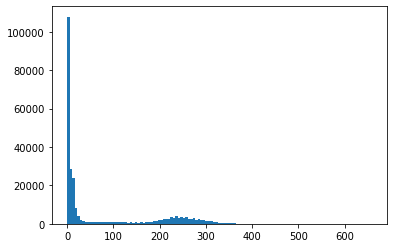

In [13]:
slice_nr = 15
image_normal = t2_flair_normal_array[slice_nr,:,:]
plt.hist(image_normal.flatten(), bins='auto')
plt.show()

### Plot Slices of Normal Patient

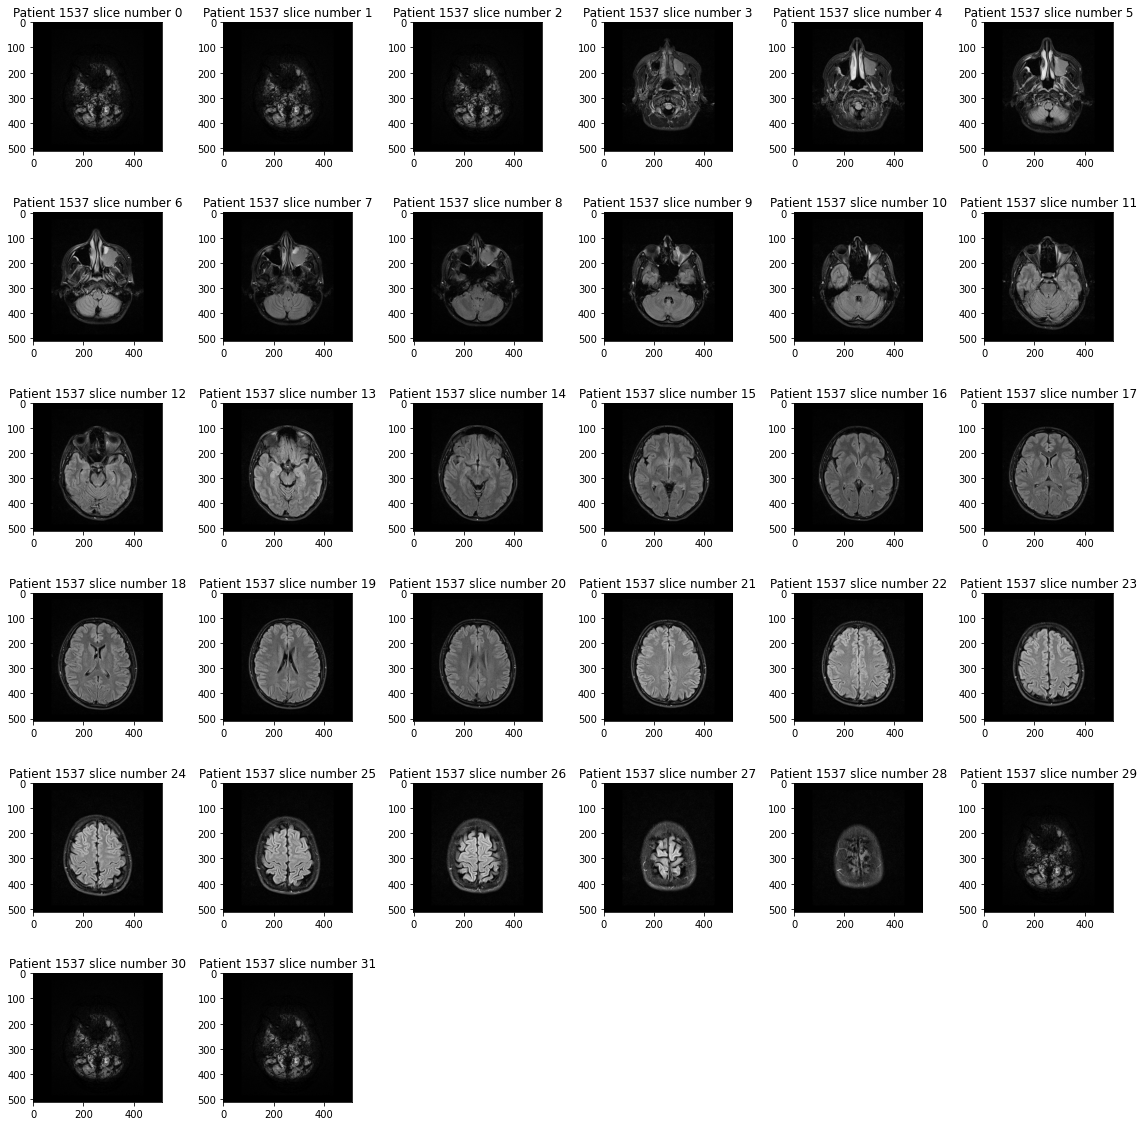

In [14]:
plot_slices(normal_patient,(0,31),DATA_DIR,6)

### Cropped Image

In [15]:
IMG_SIZE = t2_flair_normal_array.shape[1]
crop_idx = (IMG_SIZE - 425)//2
cropped_image_normal = image_normal[crop_idx:-crop_idx, crop_idx:-crop_idx]

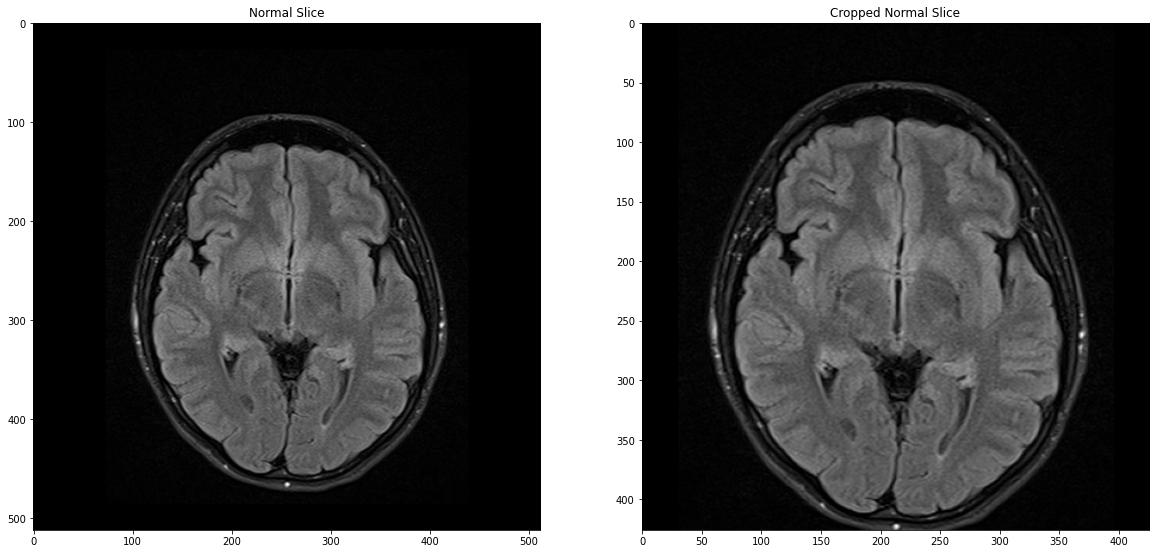

In [16]:
plt.figure(figsize=(20,20))
ax2 = plt.subplot(1,2,1)
ax2.set_title("Normal Slice")
ax2.imshow(image_normal, cmap="gray")
ax3 = plt.subplot(1,2,2)
ax3.set_title("Cropped Normal Slice")
ax3.imshow(cropped_image_normal, cmap="gray")